In [2]:
# import csv file
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [28]:
# import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df= pd.read_csv('netflix_titles.csv')
print(df.head(5))

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [30]:
# find number of rows and columns in datasets
print("Numbers of rows and columns",df.shape)


Numbers of rows and columns (8807, 12)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [32]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [33]:
# if null value appear it shows true otherwise it show false
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
# count missing value per column
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [35]:
# It fills Unknown where director and duration is null in datasets
df['director'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

/tmp/ipython-input-1546630866.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1546630866.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [36]:
# It fills Unknown where cast and country is null in datasets
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

/tmp/ipython-input-1849725862.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna('Unknown', inplace=True)
/tmp/ipython-input-1849725862.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [37]:
# count Movies and Tv Shows

df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [38]:
# find Top 10 Countries that gives more Movies and Tv Shows on Netflix
df['country'].value_counts().head(10)

,count
country,
United States,2818
India,972
Unknown,831
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124


In [39]:
# Clean data
# df.dropna() this function Drops (removes) rows that contain at least one missing value
df = df.dropna(subset=['type','title','release_year','rating','country','duration'])


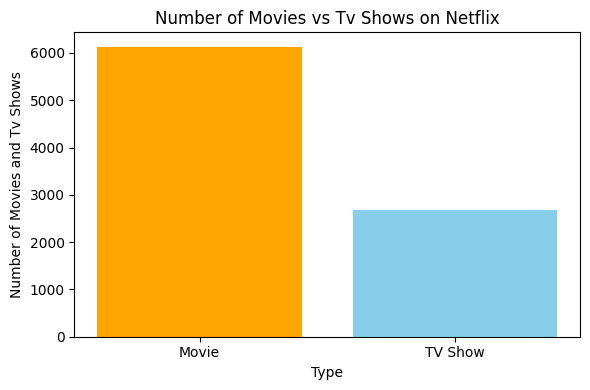

In [40]:
# count types
type_counts= df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values, color=['orange','skyblue'])
plt.title("Number of Movies vs Tv Shows on Netflix")
plt.xlabel('Type')
plt.ylabel('Number of Movies and Tv Shows')
plt.tight_layout()
plt.show()


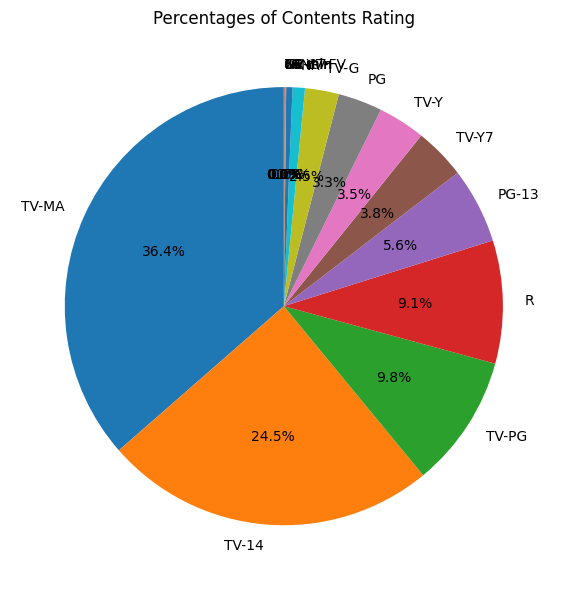

In [41]:

# pie chart that show the percentage of ratings
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.title("Percentages of Contents Rating")
plt.tight_layout()
plt.show()

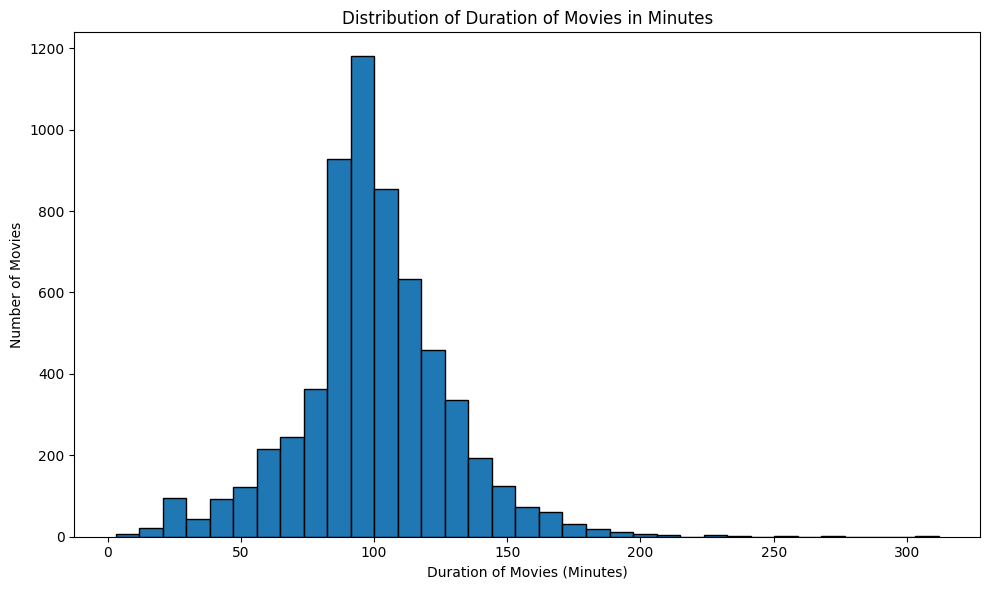

In [44]:
movies_df = df[df['type'] == 'Movie'].copy()

movies_df['duration_int'] = (
    movies_df['duration']
    .str.replace('min', '', regex=False)
    .str.strip()
)

movies_df['duration_int'] = pd.to_numeric(
    movies_df['duration_int'], errors='coerce'
)

plt.figure(figsize=(10,6))
plt.hist(movies_df['duration_int'].dropna(), bins=35, edgecolor='black')
plt.title("Distribution of Duration of Movies in Minutes")
plt.xlabel("Duration of Movies (Minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()


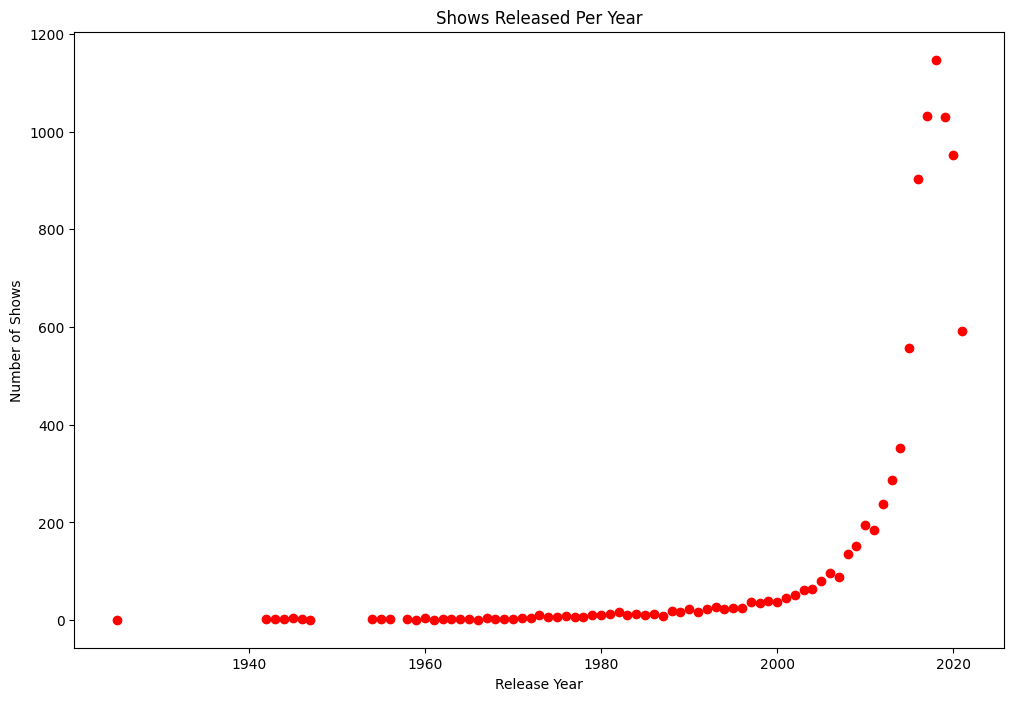

In [45]:
#Find the relationship between release_year and tv shows by using scatter chart
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,8))
     #release_counts.index ->index means release years (e.g., 2000, 2001, 2002…)
     #release_counts.values ->it counts of movies released in each year.
plt.scatter(release_counts.index,release_counts.values,color='red')
plt.title('Shows Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.show()


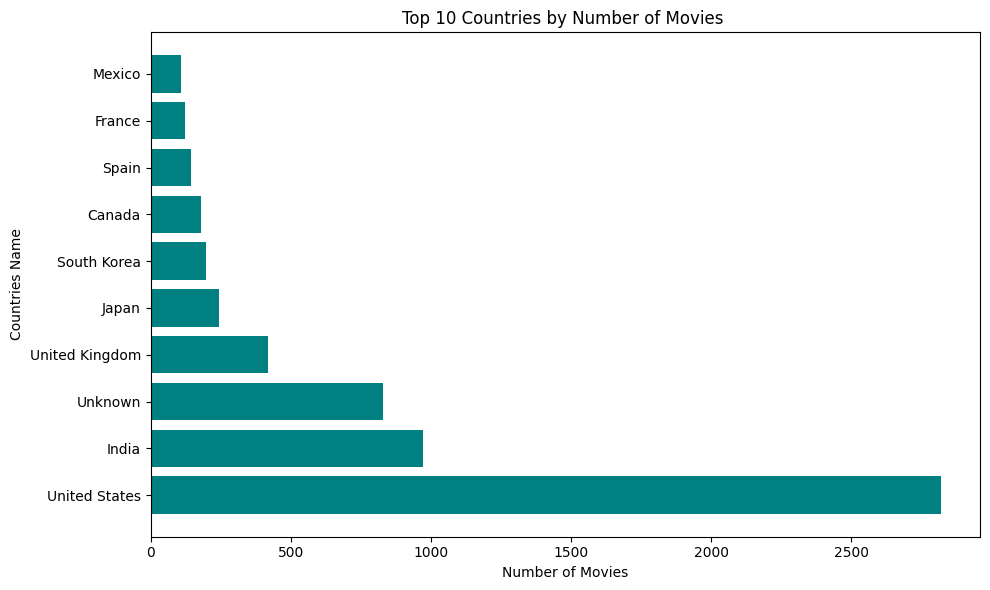

In [46]:

#Finds which counrty gives more movies by using horizontal charts.
country_counts= df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.title("Top 10 Countries by Number of Movies ")
plt.xlabel('Number of Movies')
plt.ylabel('Countries Name')
plt.tight_layout()
plt.show()

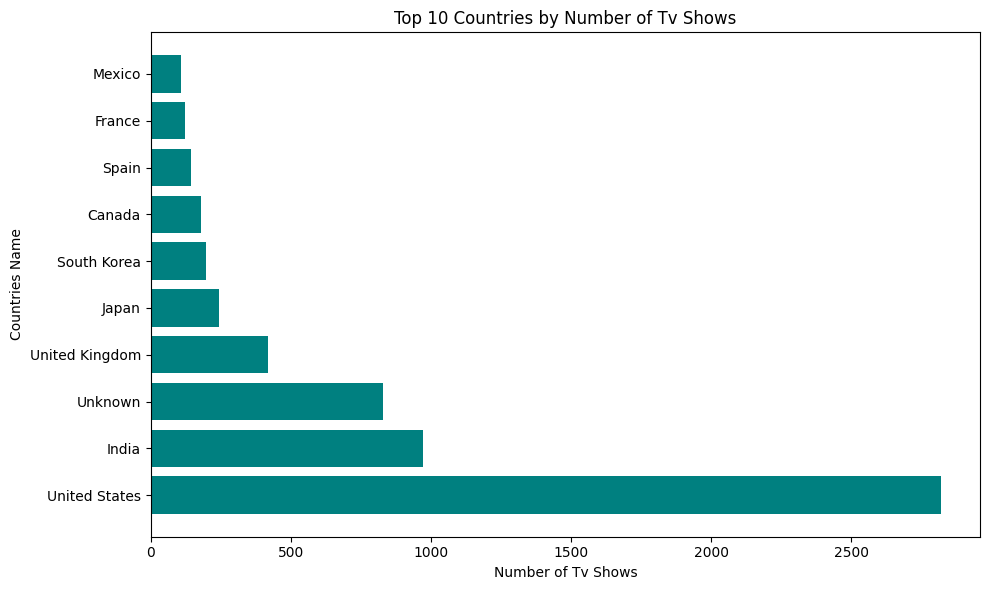

In [48]:

#Finds top 10 countries which gives more Tv Shows by using horizontal charts.
country_counts= df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.title("Top 10 Countries by Number of Tv Shows")
plt.xlabel('Number of Tv Shows')
plt.ylabel('Countries Name')
plt.tight_layout()
plt.show()